**数据可视化**

对于数据集进行可视化分析

采用柱状图和雷达图进行可视化

In [2]:
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
#导入Numpy模块库，Matplotlib模块库（都有官网教程）
import numpy as np # 进行数据格式转化
import matplotlib.pyplot as plt
import seaborn as sns  
# 可视化中文显示设置
plt.rcParams['font.sans-serif'] = ['SimHei'] # 底层参数设置解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False # 底层参数设置解决正负号乱码

csvFile='./out'+os.sep+'KMeans_clusters01.csv'
data = pd.read_csv(csvFile,encoding='utf_8_sig')
# print(data) #全部输出
print("\n输出数据前5条")
print(data.head()) #只输出前五条


输出数据前5条
   聚类个数        ZRC      ZDAC       ZNOI       ZFS      ZIBC
0  1213  -0.053767 -0.321616  -0.020317 -0.110106 -0.844334
1  1070   0.001211 -0.307070  -0.020457  0.087526  0.927444
2   368  -0.024008  1.952649  -0.015117  0.088717  0.085828
3     3  24.189545  0.325379   0.218506  1.610862  0.525942
4     1   0.190141 -0.866729  51.441360  2.425033 -1.350068


['C1', 'C2', 'C3', 'C4', 'C5']

>>> Y轴数据集：
<class 'list'>
[1213, 1070, 368, 3, 1]


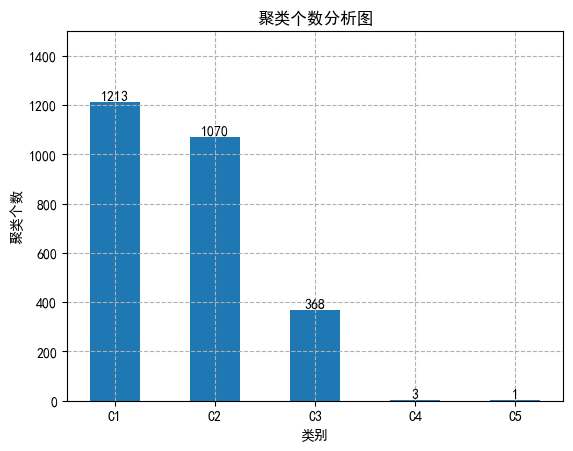

In [3]:
#  设置图标X轴刻度标签数据集（list列表数据类型）
x_labels = ['C' + str(i) for i in range(1,6)]
print(x_labels)
# 设置图表Y轴标签数据集（List列表数据类型）

# # 分割数据
# y_values = data.iloc[:,[0]]
# print(type(y_values))
# # ```
# #     涉及数据类型绑定，以满足后边对数据类型的要求
# #     DataFrame -> np.array() -> List数据结构的转换（二维至一维）
# # ```
# # # 
# y_values = np.array(y_values.to_numpy()[:])
# y_values = [y[0] for y in y_values]
# print(type(y_values))

y_values = [y[0] for y in np.array(data.iloc[:,[0]].to_numpy()[:])]
print('\n>>> Y轴数据集：')
print(type(y_values))
print(y_values)

# Matplotlib画图
# 创建一个画布
ax = plt.subplot()
# 设置Y轴显示范围
ax.set_ylim([0,1500])
# 设置轴标签提示
ax.set_xlabel('类别')
ax.set_ylabel('聚类个数')
# 设置图标的标题
ax.set_title('聚类个数分析图')

# 生成柱状图
bar = plt.bar(x_labels,y_values,width=0.5)
# 扩展：为每一个矩形柱添加数值标签
for x,y in zip(x_labels,y_values):
    # 参数里明确 位置，数值，对齐方式
    plt.text(x,y,'%.0f' %y,ha = 'center',va = 'bottom')

# 生成图标
plt.grid(linestyle='--')
plt.show()


>>>整理之后的数据集结果：
  类别名称  聚类个数  ZRC:注册资本  ZDAC:所属区县  ZNOI:参保人数  ZFS:企业规模  ZIBC:国标行业大类
0   C1  1254 -0.066920  -0.258416  -0.266795  0.800126    -0.760137
1   C2  1008  0.092003  -0.274234  -0.204060 -0.861980     0.900028
2   C3   188 -0.000126  -0.183094   2.425033 -0.479000     0.180011
3   C4   105 -0.166602   3.074799   0.377975 -0.741512     1.032167
4   C5   100  0.086957   3.120495   0.446598  0.334288    -0.962359

>>>kinds
0    C1
1    C2
2    C3
3    C4
4    C5
Name: 类别名称, dtype: object

>>> centers:
[[-6.69203365e-02 -2.58416449e-01 -2.66794856e-01  8.00125512e-01
  -7.60136936e-01 -6.69203365e-02]
 [ 9.20032248e-02 -2.74233665e-01 -2.04060198e-01 -8.61979627e-01
   9.00027696e-01  9.20032248e-02]
 [-1.25785037e-04 -1.83093892e-01  2.42503323e+00 -4.78999817e-01
   1.80011383e-01 -1.25785037e-04]
 [-1.66602168e-01  3.07479917e+00  3.77975047e-01 -7.41512360e-01
   1.03216730e+00 -1.66602168e-01]
 [ 8.69572659e-02  3.12049501e+00  4.46598020e-01  3.34288359e-01
  -9.62359063e-0

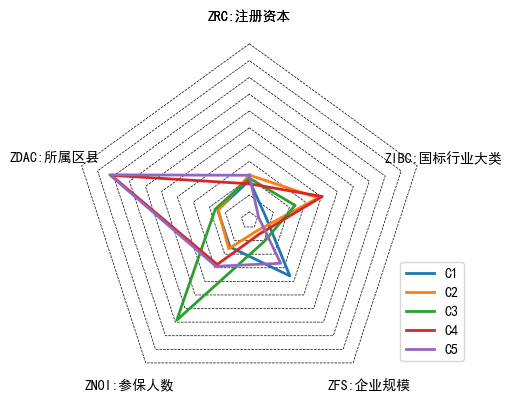

In [4]:
csvFile='./out'+os.sep+'KMeans_clusters00.csv'
data = pd.read_csv(csvFile,encoding='utf_8_sig')
# 为数据添加新列（类别名称）
customers_names = pd.Series(['C' + str(i) for i in range(1,6)])
# 连接两个数据集形成雷达图所需的基础数据结构
data = pd.concat([customers_names,data], axis = 1)
# 重新设置数据集列标题名称
data.columns = ['类别名称','聚类个数','ZRC:注册资本','ZDAC:所属区县',
                'ZNOI:参保人数','ZFS:企业规模','ZIBC:国标行业大类']
# 'ZRC','ZDAC','ZNOI','ZTOE','ZFS','ZIS','ZIBC'  对应  '注册资本','所属区县','参保人数','企业(机构)类型','企业规模','国标行业门类','国标行业大类'
# 测试
print('\n>>>整理之后的数据集结果：')
print(data)

# 获取类别名称数据集
kinds = data.iloc[:,0]
print('\n>>>kinds')
print(kinds)

# 获取特征值数据矩阵
centers = pd.concat([data.iloc[:,2:],data.iloc[:,2]],axis = 1)
# 转化成二维数据结构（雷达图需要二维数据组结构数据充当参数）
centers = np.array(centers)
print('\n>>> centers:')
print(centers)

# 获取特征值的字段名称数据集（用于设置标签名称）
labels = data.iloc[:,2:].columns
n = len(labels) # n个角

# 设置雷达图基础底线结构
angles = np.linspace(0,2*np.pi,n,endpoint=False)
angles = np.concatenate((angles,[angles[0]]))
labels=np.concatenate((labels,[labels[0]]))   #对labels进行封闭 ， 这一步不可或缺
# 开始设置画布
fig = plt.figure()
ax = fig.add_subplot(111,polar = True) # 设置作为极点坐标
# 画若干个五边形
floor = np.floor(centers.min()) # 最小值
ceil = np.ceil(centers.max()) # 最大值
for i in np.arange(floor,ceil + 0.5, 0.5):
    ax.plot(angles,[i]*(n+1),'--',lw=0.5, color = 'black')
    
# 去掉背景的圆圈
ax.spines['polar'].set_visible(False) # 去除外圈
ax.grid() # 去除内圈
ax.set_yticks([]) # 去掉原始刻度
# 设置极点方向
ax.set_theta_zero_location('N')
# 设置显示标签
ax.set_thetagrids(angles * 180 / np.pi,labels)
# 绑定数据
for i in range(len(kinds)):
    ax.plot(angles,centers[i],lw=2,label = kinds[i])

# 增加图例
plt.legend(loc = 'lower right',bbox_to_anchor=(1.1,0.1))

plt.show()